### Import

In [184]:
import heavysnow as hs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('image', cmap='Greys')
import rpy2 
%load_ext rpy2.ipython
%run pybase

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Data 

In [2]:
f=np.array([-1,-1,-1,1,-1,-1,-1,1,1,1,-1,1,1,1])*1.0
n=len(f)
V=list(range(n))
W=np.zeros([n,n])
for i in range(n):
    for j in range(n):
        if abs(i-j)==1: W[i,j]=1
W[0,0]=0.5
W[n-1,n-1]=0.5

In [3]:
gs=hs.GraphSignal(V,W,f)

In [4]:
gs.initdist=np.array([1/n]*n)

### HST

In [5]:
hst=hs.HeavySnowTransform(gs)
hst.snow(tau=80000,b=0.03)

HST (tau= 80000, b=0.03)
80000/80000
HST completed and all history is recorded.


### 시각화를 위해서 R로 자료를 옮김

In [6]:
maxtau=hst.tau
W_Graph=hst.graphweight
W_Euclid=hst.euclidweight
W_HST=hst.snowweight
V=np.array(hst.V)
f=hst.f
n=hst.n
%R -i maxtau,W_Graph,W_Euclid,W_HST,V,f,n

### R을 활용한 시각화 (1): 원래자료 

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘gridExtra’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine


R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




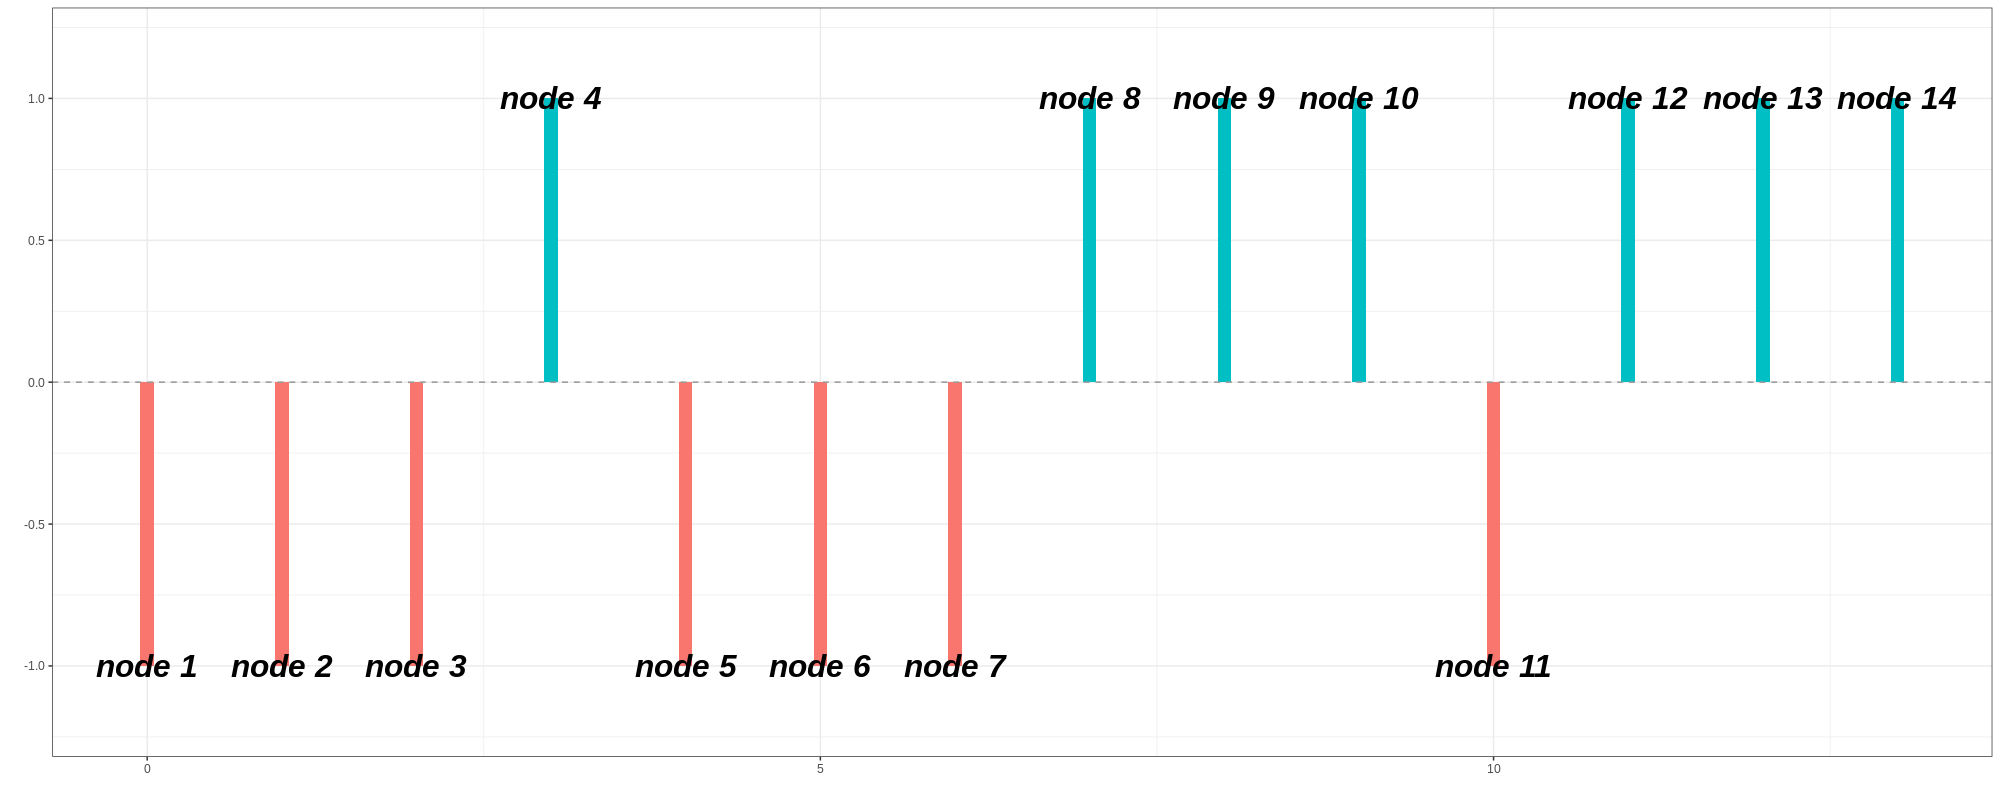

In [7]:
%%R -w 2000 -h 800 -r 100
library(tidyverse)
library(latex2exp)
library(gridExtra)
source('rbase.R')
Vtext=str_c('node ',V+1)
fig0<-ggplot(data=tibble(V=V,f=f,Vtext=Vtext),aes(x=V,y=f,label=Vtext))+
geom_col(aes(fill=(f>0)),width=0.1)+geom_hline(aes(yintercept=0),col="gray60",lty=2)+
geom_text(fontface = 4,size=8)+
xlab("")+ylab("")+guides(fill=FALSE)+theme(plot.title=element_text(face="bold.italic"))+theme_bw()+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 15, color = "black", face = "bold.italic"))+
ylim(-1.2,1.2)+
theme(plot.title=element_text(face="bold.italic"))
#ggsave(plot=p0,"./fig/2021-0217_fig0.pdf",width=20,height=6)
fig0

### R을 활용한 시각화 (2): Weight matrix 와 Eigen plot 

`-` `ggplot`에서 `geom_tile`을 사용하기 위해서 매트릭스 형태인 `W_Graph`, `W_Euclid`, `W_HST`를 길게 펼친다. 결과를 각각 `W_Graph_long`, `W_Euclid_long`, `W_HST_long`에 저장한다. 

In [8]:
%%R
grid<-expand.grid(x=1:n,y=1:n)
W_Graph_long<-as_tibble(cbind(grid,as.vector(W_Graph)));names(W_Graph_long)<-c("x","y","W")
W_Euclid_long<-as_tibble(cbind(grid,as.vector(W_Euclid)));names(W_Euclid_long)<-c("x","y","W")
W_HST_long<-as_tibble(cbind(grid,as.vector(W_HST)));names(W_HST_long)<-c("x","y","W")

`-` 그래프퓨리에 변환: $(\bf{f},\bf{W})$에 그래프 퓨리에 변환을 수행함.  

In [9]:
%%R
source('heavysnow.R')
gfftrslt_Euclid<-gfft(f,W_Euclid)
gfftrslt_Graph<-gfft(f,W_Graph)
gfftrslt_HST<-gfft(f,W_HST)

R[write to console]: 
Attaching package: ‘kohonen’


R[write to console]: The following object is masked from ‘package:purrr’:

    map




`-` 그래프 퓨리에 변환의 결과 고유치, 고유벡터, $\bf{\bar{f}}$가 반환됨. 

In [10]:
%%R
head(gfftrslt_HST)

$λ
 [1] 1.967491e+00 1.960435e+00 1.874019e+00 1.871890e+00 1.159678e+00
 [6] 1.151570e+00 8.915846e-01 8.728308e-01 1.280887e-01 1.222847e-01
[11] 1.071484e-04 2.131002e-05 5.756344e-15 6.036393e-19

$Ψ
               [,1]          [,2]          [,3]          [,4]          [,5]
 [1,] -2.858227e-01  1.138863e-05 -5.098557e-05  4.344260e-01 -4.599248e-01
 [2,]  4.135539e-01 -1.635579e-05  6.652553e-05 -5.654310e-01  1.057088e-01
 [3,] -3.533504e-01  1.366271e-05 -3.958104e-05  3.329696e-01  4.976276e-01
 [4,] -1.707615e-11  1.998879e-09 -2.163173e-09 -4.765451e-11  5.596891e-11
 [5,]  4.041036e-01 -1.428137e-05 -2.163381e-05  1.995871e-01 -5.616120e-01
 [6,] -5.447738e-01  1.855108e-05  5.033676e-05 -4.497566e-01 -8.071018e-02
 [7,]  4.029191e-01 -1.304356e-05 -4.244800e-05  3.722594e-01  4.557844e-01
 [8,] -1.387502e-05 -3.440114e-01  3.549120e-01  4.146910e-05 -3.198499e-05
 [9,]  1.981451e-05  5.167084e-01 -4.810186e-01 -5.716976e-05  4.892180e-06
[10,] -1.559414e-05 -4.200088e-01  2

`-` 시각화코드 

TableGrob (2 x 3) "arrange": 6 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]
4 4 (2-2,1-1) arrange gtable[layout]
5 5 (2-2,2-2) arrange gtable[layout]
6 6 (2-2,3-3) arrange gtable[layout]


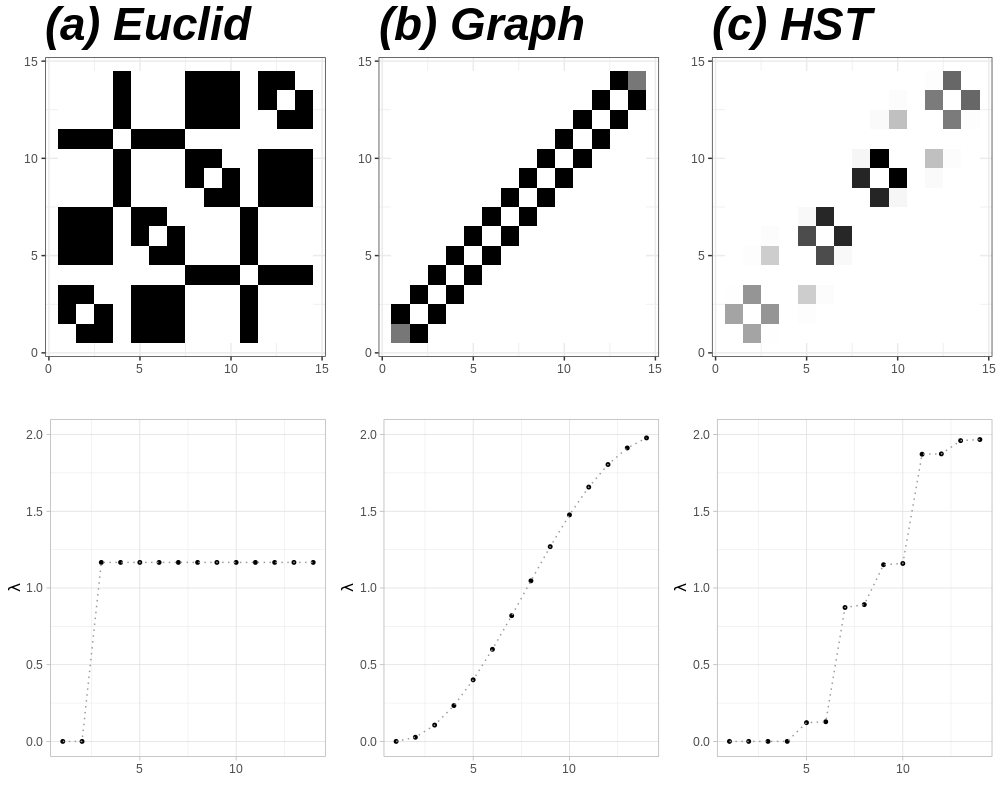

In [11]:
%%R -w 1000 -h 800 -r 100
library(gridExtra)

fig1_1<-ggplot()+geom_tile(data=W_Euclid_long,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
labs(fill=TeX('$W$'))+
theme(legend.position="none")+theme(legend.key=element_blank())+
ggtitle("(a) Euclid")+theme(plot.title=element_text(face="bold.italic",size=rel(3)))

fig1_2<-ggplot()+geom_tile(data=W_Graph_long,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
labs(fill=TeX('$\\hat{W}$'))+
theme(legend.position="none")+theme(legend.key=element_blank())+
ggtitle("(b) Graph")+theme(plot.title=element_text(face="bold.italic",size=rel(3)))

fig1_3<-ggplot()+geom_tile(data=W_HST_long,aes(x=x,y=y,fill=W))+theme_bw()+xlab("")+ylab("")+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 20, color = "black", face = "bold.italic"))+
scale_fill_gradient2(low="white",high="black")+
labs(fill=TeX('$\\hat{W}(\\tau)$'))+
theme(legend.position="none")+theme(legend.key=element_blank())+
ggtitle("(c) HST")+theme(plot.title=element_text(face="bold.italic",size=rel(3)))

fig1_4<-eigenplot(gfftrslt_Euclid)+ylim(0,2)+theme_light()
fig1_5<-eigenplot(gfftrslt_Graph)+ylim(0,2)+theme_light()
fig1_6<-eigenplot(gfftrslt_HST)+ylim(0,2)+theme_light()
fig1=grid.arrange(fig1_1,fig1_2,fig1_3,fig1_4,fig1_5,fig1_6,ncol=3,nrow=2)
fig1
#ggsave(plot=fig1,"asdf2.pdf",width=15,height=10)

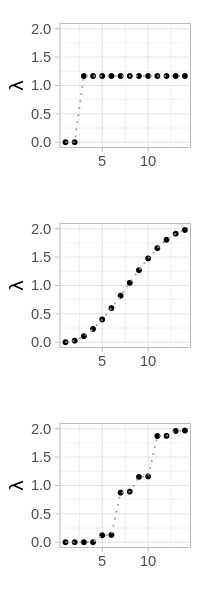

In [179]:
%%R -w 200 -h 600 -r 120
fig_= grid.arrange(fig1_4,fig1_5,fig1_6,nrow=3)
ggsave(plot=fig_,"spectrum.pdf",width=2,height=6)

### R을 활용한 시각화 (3): Decomposition 

`-` 디콤포지션을 수행하고 결과를 저장: $(\bf{f},\bf{W})$에 decomposition을 수행하고 그 결과를 각각 `decomprslt_Euclid`, `decomprslt_Graph`, `decomprslt_HST`에 저장한다. 

In [12]:
%%R 
decomprslt_Euclid<-decompose(f,W_Euclid,V=1:n) # 0, 35000, 60000, 80000
decomprslt_Graph<-decompose(f,W_Graph,V=1:n) # 0, 35000, 60000, 80000
decomprslt_HST<-decompose(f,W_HST,V=1:n) # 0, 35000, 60000, 80000

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(n)` instead of `n` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


`-` 디콤포지션 결과는 아래와 같은 형태임 

In [13]:
%%R
head(decomprslt_Euclid)

# A tibble: 6 x 5
      V Vindex eigenvectorindex      fhat eigenvalue
  <int>  <int>            <dbl>     <dbl>      <dbl>
1     1      1                1  8.02e-18   4.04e-18
2     2      2                1  2.04e-16   4.04e-18
3     3      3                1 -1.94e-16   4.04e-18
4     4      4                1  1.00e+ 0   4.04e-18
5     5      5                1 -3.67e-17   4.04e-18
6     6      6                1  1.20e-16   4.04e-18


In [14]:
%%R 
decomprslt_Euclid$method="Euclid"
decomprslt_Graph$method="Graph"
decomprslt_HST$method="HST"
decomprslt<-rbind(decomprslt_Euclid,decomprslt_Graph,decomprslt_HST)

`-` 디콤포지션결과를 시각화한다. `geom_col`과 `facet_grid`를 이용. 

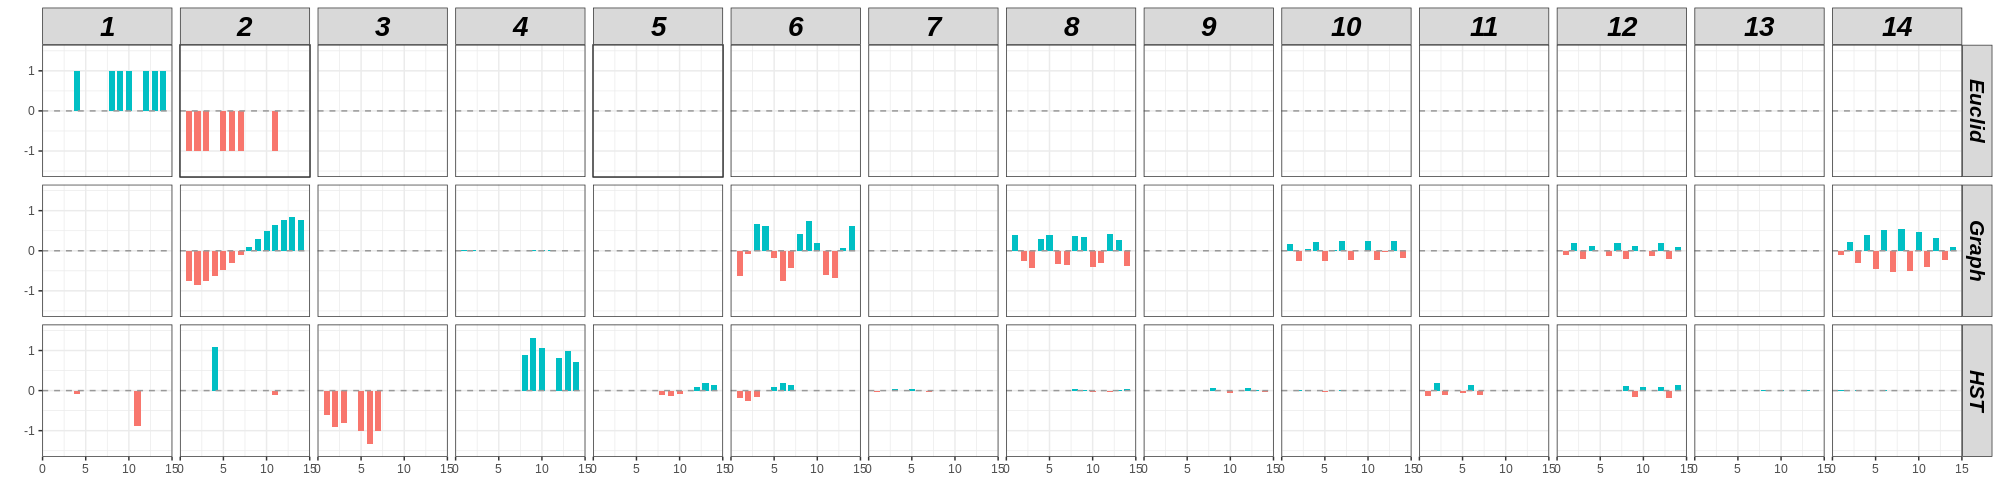

In [15]:
%%R -w 2000 -h 500 -r 100
fig2<-ggplot(data=decomprslt,aes(x=V,y=fhat))+
geom_col(aes(fill=fhat>0),width=0.7)+facet_grid(method~eigenvectorindex)+geom_hline(aes(yintercept=0),col="gray60",lty=2)+
xlab("")+ylab("")+guides(fill=FALSE)+theme(plot.title=element_text(face="bold.italic"))+theme_bw()+
theme(strip.text.x = element_text(size = 20, color = "black", face = "bold.italic"))+
theme(strip.text.y = element_text(size = 15, color = "black", face = "bold.italic"))+
ylim(-1.5,1.5)+
theme(plot.title=element_text(face="bold.italic"))
fig2
#ggsave(plot=fig2,"asdf.pdf",width=20,height=6)

### Appendix 

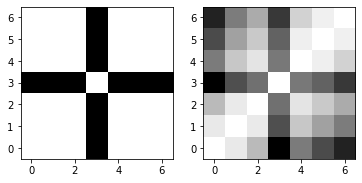

In [199]:
_, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(hst.eucliddistance[:7,:7],origin='lower')
ax2.imshow(hst.snowdistance[:7,:7],origin='lower')
plt.show()

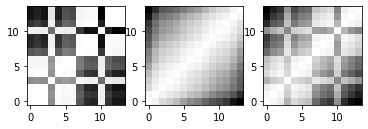

In [209]:
brk=5000
_, (ax1,ax2,ax3) = plt.subplots(1,3) 
ax1.imshow(l2distance(hst.snowygrounds.iloc[:,0:brk]),origin='lower')
ax2.imshow(l2distance(hst.snowygrounds.iloc[:,brk:]),origin='lower')
ax3.imshow(hst.snowdistance,origin='lower')
#ax4.imshow(diffusion_distance)
plt.show()

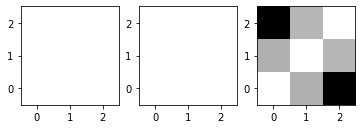

In [208]:
_, (ax1,ax2,ax3) = plt.subplots(1,3) 
ax1.imshow(hst.snowdistance1[:3,:3],origin='lower')
ax2.imshow(hst.snowdistance2[:3,:3],origin='lower')
ax3.imshow(hst.snowdistance3[:3,:3],origin='lower')
#ax4.imshow(diffusion_distance)
plt.show()

In [83]:
hst.snowdistance1[:3,:3]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [84]:
hst.snowdistance2[:3,:3]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [74]:
hst.snowdistance3[:3,:3]

array([[  0.    , 260.0478, 625.2048],
       [260.0478,   0.    , 248.562 ],
       [625.2048, 248.562 ,   0.    ]])

In [102]:
hst.snowdistance1[2:5,2:5]

array([[     0., 320004.,      0.],
       [320004.,      0., 320004.],
       [     0., 320004.,      0.]])

In [103]:
hst.snowdistance2[2:5,2:5]

array([[      0.       , -635244.4800001,       0.       ],
       [-635244.4800001,       0.       , -638790.3600001],
       [      0.       , -638790.3600001,       0.       ]])

In [105]:
hst.snowdistance3[2:5,2:5]

array([[0.00000000e+00, 3.16268692e+05, 3.04125300e+02],
       [3.16268692e+05, 0.00000000e+00, 3.19767008e+05],
       [3.04125300e+02, 3.19767008e+05, 0.00000000e+00]])

In [107]:
hst.snowdistance1[1:6,1:6]+hst.snowdistance2[1:6,1:6]+hst.snowdistance3[1:6,1:6]

array([[   0.        ,  248.562     , 1222.13219978,  535.0581    ,
         747.8532    ],
       [ 248.562     ,    0.        , 1028.21219997,  304.1253    ,
         516.9042    ],
       [1222.13219978, 1028.21219997,    0.        ,  980.64749998,
        1109.91119971],
       [ 535.0581    ,  304.1253    ,  980.64749998,    0.        ,
         207.9441    ],
       [ 747.8532    ,  516.9042    , 1109.91119971,  207.9441    ,
           0.        ]])

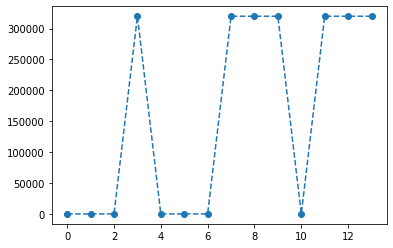

In [162]:
plt.plot((hst.snowdistance1[:,:])[0],'--o')

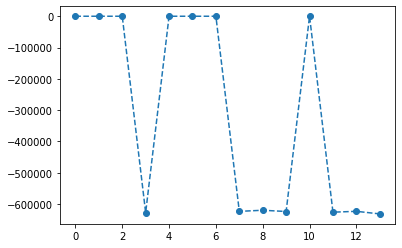

In [163]:
plt.plot((hst.snowdistance2[:,:])[0],'--o')

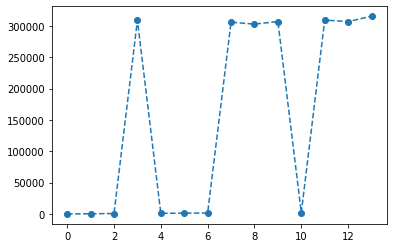

In [164]:
plt.plot((hst.snowdistance3[:,:])[0],'--o')

In [141]:
y[[1,2]]

array([260.0478, 625.2048])

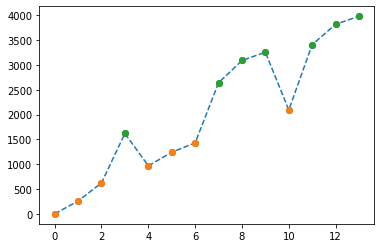

In [210]:
y=hst.snowdistance[0]
plt.plot(y,'o--')
plt.plot([0,1,2,4,5,6,10],y[[0,1,2,4,5,6,10]],'o')
plt.plot([3,7,8,9,11,12,13],y[[3,7,8,9,11,12,13]],'o')

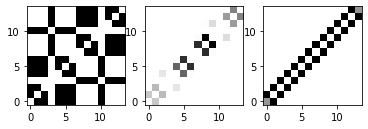

In [196]:
p, (ax1,ax2,ax3) = plt.subplots(1,3) 
ax1.imshow(hst.euclidweight,origin='lower')
ax2.imshow(hst.snowweight,origin='lower')
ax3.imshow(hst.graphweight,origin='lower')
#ax4.imshow(diffusion_distance)
#p.show()
p.savefig('temp.pdf', transparent=True)

In [23]:
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:100])/(100*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:1000])/(1000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:10000])/(10000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:15000])/(15000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:20000])/(20000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:25000])/(25000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:30000])/(30000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:35000])/(35000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:40000])/(40000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:45000])/(45000*hst.b**2)))
print(np.max(l2distance(hst.snowygrounds_sumxi.iloc[:,0:50000])/(50000*hst.b**2)))

51.44000000000009
3054.51
4508.643399999829
4503.149666666355
4528.726600000274
4561.012840000717
4577.699633334383
4562.227885715406
4572.30602500118
4596.212111112275
4587.6461600011835
